In [1]:
!git clone https://github.com/ultralytics/yolov5

'git' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
cd yolov5

C:\Users\user\Desktop\YOLO\yolov5


In [3]:
!pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\id301839\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\id301839\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\id301839\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-23 Python-3.9.5 torch-1.8.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [8]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp17/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\id301839/.cache\torch\hub\master.zip


ModuleNotFoundError: No module named 'torchvision'

In [8]:
img = 'yolov5/data/images/Capture.PNG'

In [9]:
#model.conf = 0.7
results = model(img)

In [10]:
results.print()

image 1/1: 779x681 3 Doors, 1 Zone
Speed: 32.1ms pre-process, 478.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 576)


In [46]:
#labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
import pandas as pd
zones_cor = results.pandas().xyxy[0]

frame =np.zeros((786,1024,3), np.uint8)
zones = []

for index, zc in zones_cor.iterrows():
    if zc['name']=='Zone':
        cv2.rectangle(frame, (int(zc['xmin']/2),int(zc['ymin']/2)), (int(zc['xmax']/2),int(zc['ymax']/2)), (0, 255, 0), 2)
        l = zc['xmax'] - zc['xmin']
        w = zc['ymax'] - zc['ymin']
        zones.append({"class": zc['name'],"length":l, "width":w, "x":zc['xmin'], "y":zc['ymin']})
        cv2.imshow("OutputWindow",frame)
cv2.waitKey()

print(zones)
zones_cor

[{'class': 'Zone', 'length': 363.4476318359375, 'width': 390.739990234375, 'x': 1425.7120361328125, 'y': 889.09765625}, {'class': 'Zone', 'length': 352.7462463378906, 'width': 388.09478759765625, 'x': 394.5189514160156, 'y': 370.64300537109375}, {'class': 'Zone', 'length': 484.8062744140625, 'width': 397.6121826171875, 'x': 1297.172607421875, 'y': 371.31201171875}, {'class': 'Zone', 'length': 387.97894287109375, 'width': 314.75579833984375, 'x': 739.7385864257812, 'y': 903.8058471679688}]


,xmin,ymin,xmax,ymax,confidence,class,name
0,1425.712036,889.097656,1789.159668,1279.837646,0.952968,2,Zone
1,394.518951,370.643005,747.265198,758.737793,0.935952,2,Zone
2,1297.172607,371.312012,1781.978882,768.924194,0.927614,2,Zone
3,738.608521,591.061218,836.554932,676.863342,0.913250,0,Door
4,841.289856,296.471863,942.209290,391.347443,0.911268,0,Door
5,1509.978149,887.565918,1613.471558,993.013977,0.904534,0,Door
6,1431.870972,995.742859,1543.005981,1090.050293,0.891637,0,Door
7,1492.132080,369.019348,1633.745117,411.583069,0.885459,1,Window
8,740.863831,514.115112,837.656311,597.747314,0.885028,0,Door
9,745.064392,847.268433,836.184082,927.103882,0.862517,0,Door


In [6]:
#labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
#print(labels)
#print(cord_thres)
results.xyxyn[0][:, :].numpy()

array([[    0.70475,     0.51572,     0.88441,     0.74237,     0.95297,           2],
       [    0.19502,     0.21499,     0.36938,      0.4401,     0.93595,           2],
       [    0.64121,     0.21538,     0.88086,     0.44601,     0.92761,           2],
       [    0.36511,     0.34284,     0.41352,     0.39261,     0.91325,           0],
       [    0.41586,     0.17197,     0.46575,       0.227,     0.91127,           0],
       [    0.74641,     0.51483,     0.79756,     0.57599,     0.90453,           0],
       [     0.7078,     0.57758,     0.76273,     0.63228,     0.89164,           0],
       [    0.73758,     0.21405,     0.80759,     0.23874,     0.88546,           1],
       [    0.36622,     0.29821,     0.41407,     0.34672,     0.88503,           0],
       [     0.3683,     0.49146,     0.41334,     0.53776,     0.86252,           0],
       [    0.86671,     0.55694,     0.88556,     0.58547,     0.82489,           1],
       [    0.86712,     0.38134,     0.886

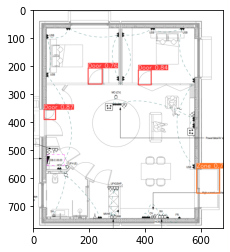

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()